In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

Understand Data

In [2]:
df = sns.load_dataset("iris")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Target Variable

In [3]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

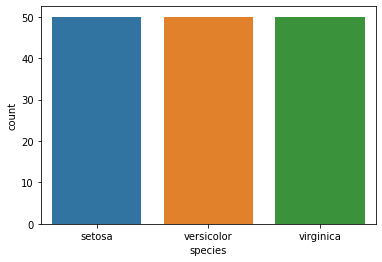

In [4]:
sns.countplot(df['species']);

Feature Distribution

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

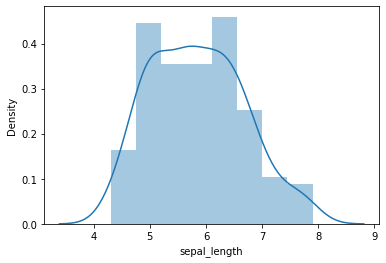

In [10]:
sns.distplot(df['sepal_length'])

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

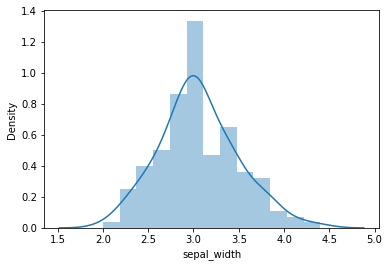

In [11]:
sns.distplot(df['sepal_width'])

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

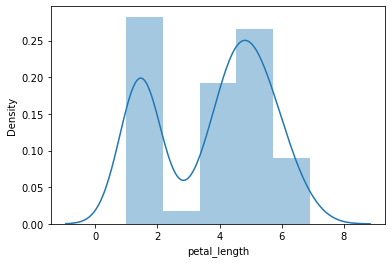

In [12]:
sns.distplot(df['petal_length'])

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

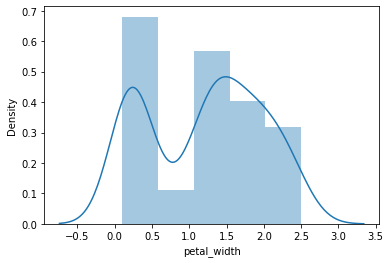

In [13]:
sns.distplot(df['petal_width'])

In [22]:
df.skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

Outliers

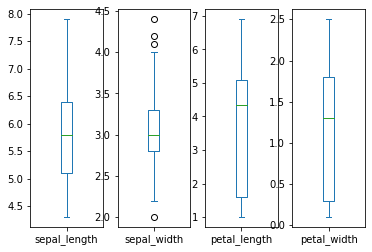

In [21]:
df.plot(kind='box',subplots=True)
plt.show()

In [23]:
print(df['sepal_width'].quantile(0.10))
print(df['sepal_width'].quantile(0.90))

2.5
3.6099999999999994


In [24]:
df['sepal_width'] = np.where(df['sepal_width'] > 3.6099999999999994,3.6099999999999994,df['sepal_width'])
df['sepal_width'] = np.where(df['sepal_width'] < 2.5,2.5,df['sepal_width'])

<AxesSubplot:xlabel='sepal_width'>

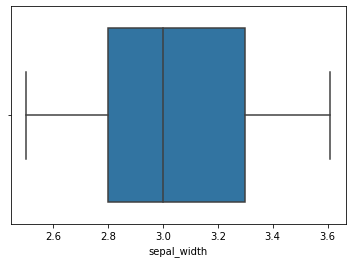

In [25]:
sns.boxplot(df['sepal_width'])

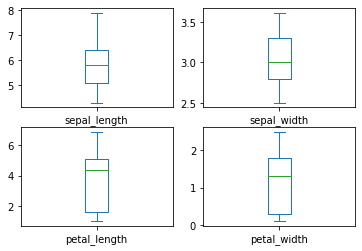

In [26]:
df.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

In [27]:
df.skew()

sepal_length    0.314911
sepal_width     0.075703
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Corrleation Matrix

In [34]:
df_corr = df.corr()

df_corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.146846,0.871754,0.817941,0.782561
sepal_width,-0.146846,1.000000,-0.447952,-0.379845,-0.446492
petal_length,0.871754,-0.447952,1.000000,0.962865,0.949035
petal_width,0.817941,-0.379845,0.962865,1.000000,0.956547
species,0.782561,-0.446492,0.949035,0.956547,1.000000


<AxesSubplot:>

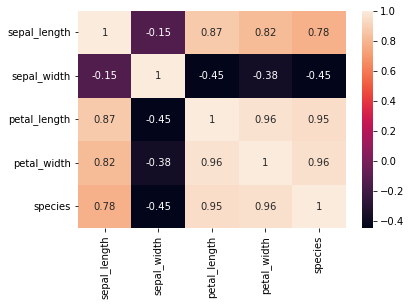

In [35]:
sns.heatmap(df_corr,annot=True)

In [36]:
X = df.drop(['species'],axis=1)
Y = df['species']

Scaling Variables

In [38]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

x_scaled

array([[-9.00681170e-01,  1.30008906e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.30676596e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  4.41629665e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  1.55476534e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.58624219e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.61485750e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  1.01393593e+00, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  1.01393593e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -4.16829727e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  1.55476534e-01, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.61485750e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  1.01393593e+00, -1.22655167e+00,
      

# VIF:Multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,6.851340,sepal_length
1,2.098878,sepal_width
2,31.583604,petal_length
3,16.324174,petal_width


In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import ShuffleSplit,StratifiedKFold
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [44]:
best_rstate=0
accu=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_lr = lr.predict(x_test)
    a = accuracy_score(y_test,y_lr)
    b = confusion_matrix(y_test,y_lr)
    
    if a > accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  100.0 found on random state 9


In [52]:
lr = LogisticRegression(random_state=9)
lr.fit(x_train,y_train)
y_lr = lr.predict(x_test)
y_lr
print(accuracy_score(y_test,y_lr))
print(classification_report(y_test,y_lr))
print(confusion_matrix(y_test,y_lr))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 17  1]
 [ 0  0 15]]


In [56]:
K_fold = KFold(5,random_state=9,shuffle=True)
print(K_fold)
l = cross_val_score(lr,x_scaled,Y,cv=K_fold,scoring="accuracy")
print(l.mean())

shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=9)
print(shuffle)
l = cross_val_score(lr,x_scaled,Y,cv=shuffle,scoring="accuracy")
print(l.mean())

sk_fold = StratifiedKFold(n_splits=5,random_state=9,shuffle=True)
l = cross_val_score(lr,x_scaled,Y,cv=sk_fold)
print(l)
print(l.mean())

KFold(n_splits=5, random_state=9, shuffle=True)
0.9666666666666666
ShuffleSplit(n_splits=5, random_state=9, test_size=0.3, train_size=None)
0.9600000000000002
[0.96666667 0.93333333 1.         0.93333333 0.96666667]
0.96


# KNN

In [57]:
best_rstate=0
accu=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.30,random_state=i)
    Knn = KNeighborsClassifier()
    Knn.fit(x_train,y_train)
    y_Knn = Knn.predict(x_test)
    a = accuracy_score(y_test,y_Knn)
    b = confusion_matrix(y_test,y_Knn)

    if a > accu:
        accu=a
        best_rstate=i


print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  100.0 found on random state 2


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.30,random_state=2)
Knn = KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_Knn = Knn.predict(x_test)
print(accuracy_score(y_test,y_Knn))
print(classification_report(y_test,y_Knn))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [65]:
K_fold = KFold(5,random_state=2,shuffle=True)
print(K_fold)
l1 = cross_val_score(Knn,x_scaled,Y,cv=K_fold,scoring="accuracy")
print(l1.mean())

shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=2)
print(shuffle)
l2 = cross_val_score(Knn,x_scaled,Y,cv=shuffle,scoring="accuracy")
print(l2.mean())

sk_fold = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
l3 = cross_val_score(Knn,x_scaled,Y,cv=sk_fold)
print(l3)
print(l3.mean())

KFold(n_splits=5, random_state=2, shuffle=True)
0.9400000000000001
ShuffleSplit(n_splits=5, random_state=2, test_size=0.3, train_size=None)
0.9555555555555555
[0.86666667 0.96666667 1.         0.9        0.96666667]
0.9400000000000001


# Decision Tree

In [61]:
best_rstate=0
accu=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.30,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_dt = dt.predict(x_test)
    a = accuracy_score(y_test,y_dt)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  100.0 found on random state 9


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.30,random_state=9)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt = dt.predict(x_test)
dt_accu = accuracy_score(y_test,y_dt)*100
print(dt_accu)
print(classification_report(y_test,y_dt))
print(confusion_matrix(y_test,y_dt))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


In [64]:
#K-fold cross validation
K_fold = KFold(5,random_state=9,shuffle=True)
print(K_fold)
d1 = cross_val_score(dt,x_scaled,Y,cv=K_fold,scoring="accuracy")
print(d1.mean())

#Repeated Random Test-Train Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=9)
print(shuffle)
d2 = cross_val_score(dt,x_scaled,Y,cv=shuffle,scoring="accuracy")
print(d2.mean())

#Stratisfied K Fold Cross Validation
sk_fold = StratifiedKFold(n_splits=5,random_state=9,shuffle=True)
d3 = cross_val_score(dt,x_scaled,Y,cv=sk_fold)
print(d3)
print(d3.mean())

KFold(n_splits=5, random_state=9, shuffle=True)
0.9533333333333335
ShuffleSplit(n_splits=5, random_state=9, test_size=0.3, train_size=None)
0.9600000000000002
[0.96666667 0.93333333 1.         0.9        0.96666667]
0.9533333333333334


# Random Forest

In [68]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred_2=rf.predict(x_test)
    a=accuracy_score(y_test,y_pred_2)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  100.0 found on random state 9


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.30,random_state=9)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_2 = dt.predict(x_test)
rf_accu = accuracy_score(y_test,y_pred_2)*100
print(rf_accu)
print(classification_report(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


In [70]:
#K-fold cross validation
K_fold = KFold(5,random_state=9,shuffle=True)
print(K_fold)
r1 = cross_val_score(rf,x_scaled,Y,cv=K_fold,scoring="accuracy")
print(r1.mean())

#Repeated Random Test-Train Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=9)
print(shuffle)
r2 = cross_val_score(rf,x_scaled,Y,cv=shuffle,scoring="accuracy")
print(r2.mean())

#Stratisfied K Fold Cross Validation
sk_fold = StratifiedKFold(n_splits=5,random_state=9,shuffle=True)
r3 = cross_val_score(rf,x_scaled,Y,cv=sk_fold)
print(r3)
print(r3.mean())

KFold(n_splits=5, random_state=9, shuffle=True)
0.9533333333333334
ShuffleSplit(n_splits=5, random_state=9, test_size=0.3, train_size=None)
0.9644444444444445
[0.93333333 0.93333333 1.         0.93333333 0.96666667]
0.9533333333333334


# SVC

In [71]:
best_rstate=0
accu=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.30,random_state=i)
    svc = SVC()
    svc.fit(x_train,y_train)
    y_svc = svc.predict(x_test)
    a = accuracy_score(y_test,y_svc)
    b = confusion_matrix(y_test,y_svc)
    
    if a > accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  100.0 found on random state 9


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.30,random_state=9)
svc = SVC()
svc.fit(x_train,y_train)
y_svc = svc.predict(x_test)
print(accuracy_score(y_test,y_svc))
print(classification_report(y_test,y_svc))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [76]:
#K-fold cross validation
K_fold = KFold(5,random_state=9,shuffle=True)
print(K_fold)
s1 = cross_val_score(svc,x_scaled,Y,cv=K_fold,scoring="accuracy")
print(s1.mean())

#Repeated Random Test-Train Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=9)
print(shuffle)
s2 = cross_val_score(svc,x_scaled,Y,cv=shuffle,scoring="accuracy")
print(s2.mean())

#Stratisfied K Fold Cross Validation
sk_fold = StratifiedKFold(n_splits=5,random_state=9,shuffle=True)
s3 = cross_val_score(svc,x_scaled,Y,cv=sk_fold)
print(s3)
print(s3.mean())

KFold(n_splits=5, random_state=9, shuffle=True)
0.9666666666666668
ShuffleSplit(n_splits=5, random_state=9, test_size=0.3, train_size=None)
0.9600000000000002
[0.93333333 0.93333333 1.         0.93333333 1.        ]
0.96


In [78]:
import pickle
filename = 'Iris_Classification.pkl'

In [79]:
pickle.dump(rf,open(filename,'wb'))